# TP 1 de $\textit{Physique numérique}$ par Gabriel Hémond et Meriem Khalfoun
# Pouvoir d’arrêt collisionnel des protons
## 1.
Typiquement, les protons utilisés en protonthérapie ont entre 70 et 250 MeV d'énergie cinétique, mais l'énergie maximale utilisée la plus commune dans les centres de photonthérapie est de 230 MeV.

L'énergie totale d'un corps s'écrit $E=\gamma mc^2$ alors que l'énergie de repos s'écrit $E_0=mc^2$, donc l'énergie cinétique est $T=E-E_0=(\gamma-1)mc^2$. En inversant cette équation, on obtient $$\boxed{\gamma=\frac{T}{mc^2}+1}$$ Par leur définition, $\beta=\frac{v}{c}$ et $\gamma=\frac{1}{\sqrt{1-\frac{v^2}{c^2}}}$. Par substitution, on voit que $$\boxed{\gamma=\frac{1}{\sqrt{1-\beta^2}}}\quad\text{et}\quad\boxed{\beta=\sqrt{1-\frac{1}{\gamma^2}}}$$

## 2.
La densité électronique ($n_e$) est le nombre d'électrons par unité de volume, ce qui correspond à la somme des densités atomiques des différents éléments du matériau multipliées par leur nombre de proton ($Z$) par atome correspondant (en présumant que le matériau est électriquement neutre). La densité atomique d'un élément correspond à la densité massique du matériau ($\rho$) en grammes par cm$^3$ multipliée par la fraction de la masse du matériau appartenant à l'élément ($\xi$) divisée par la masse atomique de l'élément ($m_Z$) en grammes par mole, le tout multiplié par le nombre d'Avogadro ($N_o$) pour que les grammes par moles deviennent des grammes par atome. Autrement dit, $$n_e=\rho N_A\sum_{Z=1}^\infty\frac{Z\xi_Z}{m_Z}$$
Le code suivant calcul les densités électroniques de l'eau et de l'os cortical. Les masses atomiques et les compositions atomiques ont été trouvées sur le site NIST

In [128]:
def densite_elec_massique(masses_materiau, masses_atomiques, rho, avogadro):
    """Évalue la densité électronique en électrons par cm^3"""
    densite = 0
    for i in masses_materiau:
        densite += i * masses_materiau[i] / masses_atomiques[i]
    
    densite = densite * avogadro * rho
    return densite


avogadro = 6.022 * 10 ** 23  # [atomes par mole]
masses_atomiques = {
    1: 1.0079,
    6: 12.0107,
    7: 14.0067,
    8: 15.9994,
    12: 24.305,
    15: 30.9738,
    16: 32.065,
    20: 40.078,
    30: 65.39,
}

masses_eau = {1: 0.111894, 8: 0.888106}
masses_os = {
    1: 0.047234,
    6: 0.144330,
    7: 0.041990,
    8: 0.446096,
    12: 0.002200,
    15: 0.104970,
    16: 0.003150,
    20: 0.209930,
    30: 0.000100
}
rho_os = 1.85  # Densités massiques [g/cm^3]
rho_eau = 1

dens_e_eau =  densite_elec_massique(masses_eau, masses_atomiques, rho_eau, avogadro)
dens_e_os = densite_elec_massique(masses_os, masses_atomiques, rho_os, avogadro)

print("Densité électronique de l'eau: {0} électrons par cm^3\n".format(densite_elec_eau))
print("Densité électronique de l'os cortical: {0} électrons par cm^3".format(densite_elec_os))

Densité électronique de l'eau: 3.342731617093692e+23 électrons par cm^3

Densité électronique de l'os cortical: 5.807706023151945e+23 électrons par cm^3


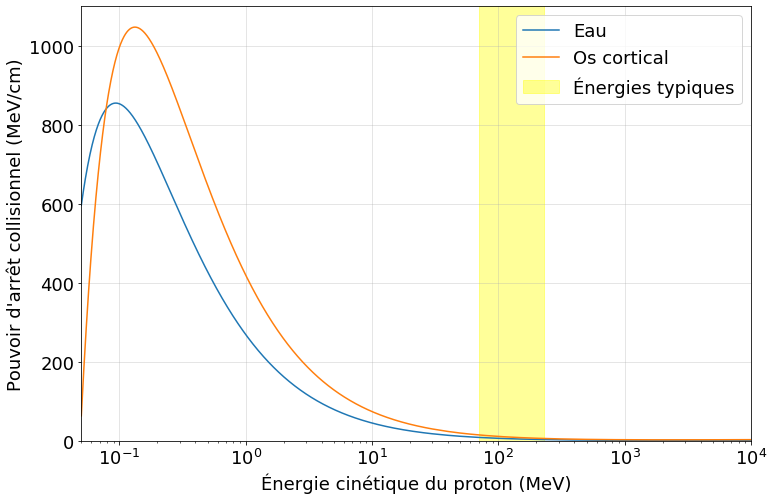

In [154]:
import matplotlib.pyplot as plt
import numpy as np

def gamma(T):
    return (T / mp) + 1


def beta(T):
    return (1 - ( 1 / (gamma(T) ** 2))) ** 0.5


def Temax(T):
    return 2 * me * ((gamma(T) ** 2) - 1) / (1 + 2 * gamma(T) * me / mp + (me / mp)**2)


def pouvoir_eau(T):
    '''Approximation du pouvoir d'arrêt de l'eau en fonction de l'énergie cinétique'''
    return 2 * np.pi * re ** 2 * me * dens_e_eau * (np.log(2 * me * beta(T) ** 2 * gamma(T) ** 2 * \
            Temax(T) / energie_eau ** 2) / beta(T) ** 2 - 2)


def pouvoir_os(T):
    '''Approximation du pouvoir d'arrêt de l'os cortical en fonction de l'énergie cinétique'''
    return 2 * np.pi * re ** 2 * me * dens_e_os * (np.log(2 * me * beta(T) ** 2 * gamma(T) ** 2 * \
            Temax(T) / energie_os ** 2) / beta(T) ** 2 - 2)


re = 2.82 * 10 ** -13  # Rayon classique de l'électron (cm)
me = 0.511  # Masse classique de l'électron multipliée par c^2 (MeV)
mp = 938  # Masse classique du proton multipliée par c^2 (MeV)
energie_eau = 75 * 10 ** -6  # Énergies d'excitation moyenne (MeV)
energie_os = 106.4 * 10 ** -6

Scol_eau = np.vectorize(pouvoir_eau)
Scol_os = np.vectorize(pouvoir_os)

axis = np.linspace(0.05, 1, 2000)
axis = np.append(axis, np.linspace(1.01, 30, 2000))
axis = np.append(axis, np.linspace(30.01, 10 ** 4, 1000))
plt.figure(figsize=(12, 8))
plt.plot(axis, Scol_eau(axis), axis, Scol_os(axis))
plt.fill_between(np.linspace(70, 230), 0, 1400, color='yellow', alpha=0.4)
plt.legend(('Eau', 'Os cortical', 'Énergies typiques'), loc='upper right', fontsize=18)
plt.xlabel('Énergie cinétique du proton (MeV)', fontsize=18)
plt.ylabel("Pouvoir d'arrêt collisionnel (MeV/cm)", fontsize=18)
plt.xlim(0.05, 10 ** 4)
plt.ylim(0, 1100)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
plt.grid('on', alpha=0.4)

# Portée des protons dans la matière
## 3.
La portée dans l'approximation CSDA ($R_{CSDA}$) est exprimée en grammes par centimètre carré. Or, on a que $\frac{R_{CSDA}}{\rho}=\int_0^{T_i}\frac{\text{d}T'}{S_{col}}$. $S_{col}$ est exprimé en MeV/cm et $\rho$ en g/cm$^3$, ce qui signifie que $\frac{\text{d}T'}{S_{col}}$ et $\frac{R_{CSDA}}{\rho}$ sont tous deux exprimés en centimètres. Ainsi, on peut dire que l'analyse dimensionnelle montre que l'équation est logique.

## 4.
Le graphique suivant superpose le pouvoir d'arrêt collisionnel calculé (en bleu) et le pouvoir d'arrêt total trouvé sur le site du NIST (en orange) entre 70 MeV et 250 MeV, c'est-à-dire dans la gamme d'énergie des protons typiquement utilisés en protonthérapie. 
On remarque que la courbe et les points se superposent parfaitement, ce qui justifie l'utilisation du pouvoir d'arrêt collisionnnel pour représenter le pouvoir d'arrêt total dans cette la gamme d'énergie communément.

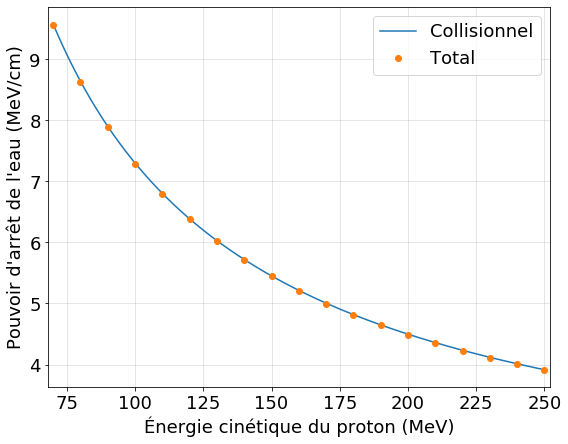

In [155]:
axis_ref = np.linspace(70, 250, 19)
ref = [9.559,8.625,7.888,7.289,6.794,6.377,6.021,5.713,5.445,5.209,4.999,4.812,4.644,4.492,4.354,4.229,4.114,4.008,3.911]
axis = np.linspace(70, 250, 4000)
plt.figure(figsize=(9, 7))
plt.plot(axis, Scol_eau(axis), axis_ref, ref, 'o')
plt.xlabel('Énergie cinétique du proton (MeV)', fontsize=18)
plt.ylabel("Pouvoir d'arrêt de l'eau (MeV/cm)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(("Collisionnel", "Total"), fontsize=18)
plt.xlim(68, 252)
plt.grid('on', alpha=0.4)

# Détermination de $R_{CSDA}$ par intégration numérique
## 5.

## 6.
L'intégrale valant $R_{CSDA}$ peut se calculer grâce à un algorithme adaptatif utilisant la méthode des trapèzes. 

L'intégration adaptative consiste à utiliser un petit nombre de trapèzes pour ensuite le doubler itérativement jusqu'à l'obtention de l'erreur désirée. L'erreur se calcule comme suit: $$\varepsilon_n = \frac{I_n- I_{n - 1}}{3}$$où $I_n=\frac{I_{n-1}}{2}+\frac{T_i}{2^n}\sum_{k=1}^{2^n-1}f\left(\frac{kT_i}{2^n}\right)$ est la valeur de l'intégrale selon le calcul effectué à la $i$ème itération.

Dans notre cas, on cherche à avoir une précision valant $10^{-9}$cm. Il est à noter que l'intégrale ne sera pas vraiment calculée entre $T_i$ et $0$ puisque l'approximation du pouvoir d'arrêt n'est pas bonne dans tout l'intervalle. Ainsi, lorsque les protons auront 1MeV, ils seront considérés comme stoppés, ceci diminue considérablement le temps de calcul et le essai erreur détermine que ça ne change pas beaucoup la réponse obtenue.

In [156]:
import time

def trapezoid_algo(Scol, Tproton, cible, start):
    """Applique la méthode des trapèzes de façon adaptative et calcule l'erreur jusqu'à l'obtention de l'erreur désirée"""
    temps = time.time()
    step = Tproton - start
    erreur = cible + 1
    n = 0
    prev = step * (1 / Scol(Tproton) + 1 / Scol(start))
    
    while erreur > cible:
        values = np.linspace(start + step / 2 ** (n + 1), Tproton - step / 2 ** (n + 1), 2 ** n)
        somme = step * np.sum(1 / Scol(values))
        current = prev / 2 + somme / 2 ** n
        erreur = abs(current - prev) / 3
        prev = current
        n += 1
    
    temps = time.time() - temps
    results = [current, erreur, n, temps]
    return results


cible = 10 ** -9  # Erreur cible [cm]
Tproton = 100  # Énergie cinétique du proton incident [MeV]
start = 1  # Point de départ de l'intégrale / énergie «d'arrêt» du proton [MeV]


RCSDA_eau = trapezoid_algo(Scol_eau, Tproton, cible, start)
RCSDA_os = trapezoid_algo(Scol_os, Tproton, cible, start)

print("La portée d'un proton à {0}MeV est ({1:13.12} ± {2:7.3})cm dans l'eau".format(Tproton, RCSDA_eau[0], RCSDA_eau[1]))
print("Ce calcul a nécessité {0:2} itérations et {1:17.15f} secondes\n".format(RCSDA_eau[2], RCSDA_eau[3]))
print("La portée d'un proton à {0}MeV est ({1:13.12} ± {2:7.3})cm dans l'os cortical".format(Tproton, RCSDA_os[0], RCSDA_os[1]))
print("Ce calcul a nécessité {0:2} itérations et {1:17.15f} secondes".format(RCSDA_os[2], RCSDA_os[3]))

La portée d'un proton à 100MeV est (15.3984921792 ± 6.01e-10)cm dans l'eau
Ce calcul a nécessité 16 itérations et 0.299567461013794 secondes

La portée d'un proton à 100MeV est (9.30997012876 ± 3.72e-10)cm dans l'os cortical
Ce calcul a nécessité 16 itérations et 0.296854257583618 secondes


## 7.
On sait que:
\begin{aligned}
\beta^2 &= 1 - \frac{1}{\gamma^2} = \frac{\gamma^2 - 1}{\gamma^2}\\
\gamma &= \frac{T}{m_pc^2} + 1 \\
\frac{\text{d}\gamma}{\text{d}T} &= \frac{1}{m_pc^2}
\end{aligned}

En posant les variables suivantes:
\begin{aligned}
&T_{e}^{\max }=\frac{a c^2 \left(\gamma^{2}-1\right)}{b+ 2\gamma d}\\
&\text { avec }: a=2 m_{e}, \quad b=1+\left(\frac{m_{e}}{m_{p}}\right)^{2} \quad \text { et } \quad d=\frac{m_{e}}{m_{p}}\\
&U=2 \pi r_{e}^{2} m_{e} c^{2} n_{e}\\
&k=\frac{a^{2}}{I^{2}}
\end{aligned}

On peut réécrire le pouvoir d’arrêt collisionnel en fonction de $\gamma$:
\begin{aligned}
S_{col}(\gamma) &= U\frac{\gamma^2}{\gamma^2 - 1} \left( \ln \left( \frac{k c^4 (\gamma^2 - 1)^2}{b + 2d\gamma} \right) -2\frac{(\gamma^2 - 1)}{\gamma^2} \right)
\end{aligned}

Grâce au théorème de dérivations des fonctions composées, on sait que $\frac{\text{d}S_{col}}{\text{d}T} = \frac{\text{d}S_{col}}{\text{d}\gamma} \frac{\text{d}\gamma}{\text{d}T}$

La dérivée en fonction de T du pouvoir d'arrêt collisionnel est donc:
$$\frac{\text{d}S_{col}}{\text{d}T} = \frac{1}{m_pc^2}\left(-\frac{2U\gamma}{(\gamma^2 - 1)^2} \ln \left(\frac{kc^4 (\gamma^2 - 1)^2}{b + 2d\gamma}\right) + \frac{2U\gamma^2(2b\gamma+3\gamma^2d+d)}{(\gamma^2 - 1)^2(b+2\gamma d)}\right)$$
De plus, la dérivée de l'inverse du pouvoir d'arrêt peut être trouvée grâce à la dérivation en chaîne:
$$\frac{\text{d}}{\text{d}T}\left(\frac{1}{S_{col}}\right)=-\frac{1}{(S_{col})^2}\frac{\text{d}S_{col}}{\text{d}T}$$

Le code suivant trace le graphique de la dérivée du pouvoir d'arrêt collisionnel et le graphique de l'inverse du pouvoir d'arrêt collisionnel en fonction de l'énergie cinétique du proton. L'énergie cinétique est en échelle logarithmique. Les
énergies moyennes d’excitation (I) ont été trouvées sur le site du NIST

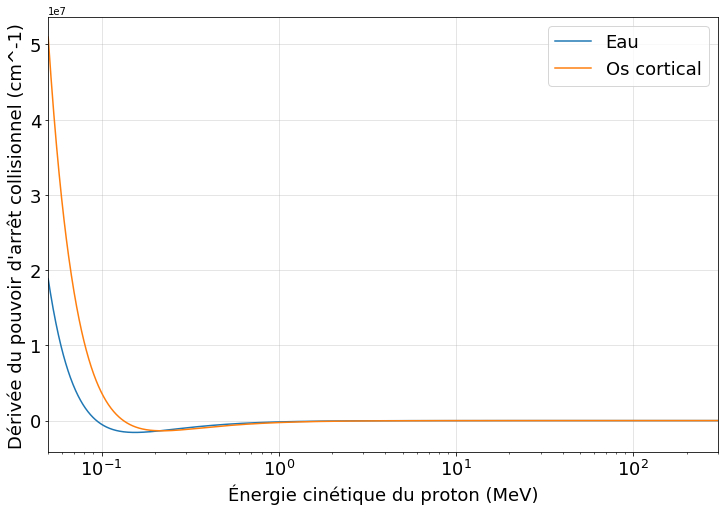

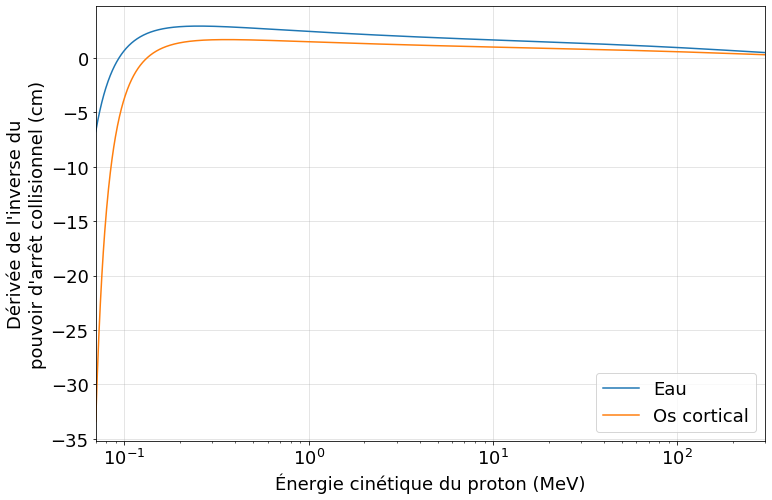

In [157]:
def Sprime(energie, dens, re, me, mp):
    Scolp = lambda T : 4 * np.pi * re ** 2 * me * dens * ((T / mp + 1) ** 2 * (2 * (T / mp + 1) + 2 * (T / mp + 1) * \
                        (me / mp) ** 2 + 3 * me * (T / mp + 1) ** 2 / mp + me / mp) / (1 + (me / mp) ** 2 + 2 * me * \
                            (T / mp + 1) ** 2 / mp) - (T / mp + 1) * np.log(2 * me * (1 - 1 / (T / mp + 1) ** 2) * \
                                (T / mp + 1) ** 2 * ((2 * me * ((T / mp + 1) ** 2 - 1)) / (1 + 2 * (T / mp + 1) * \
                                    me / mp + (me / mp) ** 2)) / energie ** 2)) / ((T / mp + 1) ** 2 - 1) ** 2
    return Scolp


Sprime_eau = np.vectorize(Sprime(energie_eau, densite_elec_eau, re, me, mp))
Sprime_os = np.vectorize(Sprime(energie_os, densite_elec_os, re, me, mp))
Sprime_inv_eau = lambda T : -1 * Sprime_eau(T) / (Scol_eau(T)) ** 2
Sprime_inv_os = lambda T : -1 * Sprime_os(T) / (Scol_os(T)) ** 2

axis1 = np.linspace(0.05, 1, 2000)
axis1 = np.append(axis1, np.linspace(1.01, 30, 2000))
axis1 = np.append(axis1, np.linspace(30.01, 10 ** 4, 1000))
plt.figure(figsize=(12, 8))
plt.plot(axis1, Sprime_eau(axis1) , axis1, Sprime_os(axis1))
plt.legend(('Eau', 'Os cortical'), loc='upper right', fontsize=18)
plt.xlabel('Énergie cinétique du proton (MeV)', fontsize=18)
plt.ylabel("Dérivée du pouvoir d'arrêt collisionnel (cm^-1)", fontsize=18)
plt.xlim(0.05, 300)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
plt.grid('on', alpha=0.4)

axis2 = np.linspace(0.07, 1, 2000)
axis2 = np.append(axis2, np.linspace(1.01, 30, 2000))
axis2 = np.append(axis2, np.linspace(30.01, 10 ** 4, 1000))
plt.figure(figsize=(12, 8))
plt.plot(axis2, Sprime_inv_eau(axis2) , axis2, Sprime_inv_os(axis2))
plt.legend(('Eau', 'Os cortical'), loc='lower right', fontsize=18)
plt.xlabel('Énergie cinétique du proton (MeV)', fontsize=18)
plt.ylabel("Dérivée de l'inverse du\npouvoir d'arrêt collisionnel (cm)", fontsize=18)
plt.xlim(0.07, 300)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
plt.grid('on', alpha=0.4)

## 8.
L'erreur pour la méthode des trapèzes obéit à l'équation suivante: $$\epsilon\simeq\frac{h^2|f'(a)-f'(b)|}{12\int_a^bf(x)\text{d}x}$$où $h$ est le pas, dont la valeur est $\frac{b-a}{2^n}$, où $n$ est le nombre d'itérations nécessaires.

In [158]:
diff_diff_eau = abs(Sprime_inv_eau(start) - Sprime_inv_eau(Tproton))
print("La différence de dérivées pour l'eau est de {}".format(diff_diff_eau))
approx_erreur_eau = diff_diff_eau * (start - Tproton) ** 2 / (12 * 2 ** (2 * RCSDA_eau[2]) * RCSDA_eau[0])
print("L'erreur selon cette équation est de {}cm".format(approx_erreur_eau))
diff_diff_os = abs(Sprime_inv_os(start) - Sprime_inv_os(Tproton))
print("La différence de dérivées pour l'os cortical est de {}".format(diff_diff_os))
approx_erreur_os = diff_diff_os * (start - Tproton) ** 2 / (12 * 2 ** (2 * RCSDA_os[2]) * RCSDA_os[0])
print("L'erreur selon cette équation est de {}cm".format(approx_erreur_os))

La différence de dérivées pour l'eau est de 1.4823375736132245
L'erreur selon cette équation est de 1.830619997146257e-08cm
La différence de dérivées pour l'os cortical est de 0.9175972803767801
L'erreur selon cette équation est de 1.874274135483943e-08cm


# Optimisation
## 9.


In [111]:
from scipy.special.orthogonal import p_roots

def estime_nombre_gauss(Scol, cible, Tproton, start)
    N = 1
    [T, weight] = p_roots(N)
    while erreur > cible:
        current = (Tproton - start) * np.sum(weight * Scol(((Tproton - start) * T + (Tproton + start)) / 2)) / 2
        erreur = abs(current - prev)
        prev = current
        n += 1
def gauss_algo(Scol, Tproton, start, N):
    erreur = cible + 1
    while erreur > cible:
        [T, w] = p_roots(N)
        for i in range(N):
            current = (Tproton - start) * np.sum(w[i] * Scol(((Tproton - start) * T[i] + (Tproton + start)) / 2)) / 2
            
    return Gauss

NameError: name 'erreur' is not defined

## 10.
Avec l'approximation grossière $N\sim C^{-\frac{1}{2}}$ où $N$ est le nombre de points à considérer et $C$ est l'erreur désirée, on obtient que le nombre de points à utiliser est environ 31623. Afin de s'assurer que l'erreur sera toujours plus basse que $10^{-9}$cm, nous utiliserons plutôt 35000 points + les 2 points qui représentent les extrémités.

Durée: 15.99292516708374 secondes. Fréquence: 6.252764829151932 protons par seconde


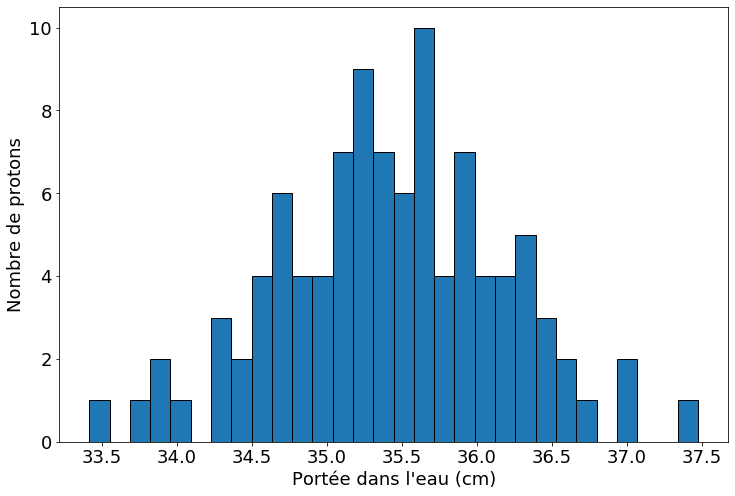

In [160]:
def trapezoid_pasdaptatif(Scol, énergies, start, N):
    temps = time.time()
    step = (énergies - start) / N
    values = np.linspace(step + start, énergies - step, N)
    estimates = step * np.sum(1 / Scol(values), axis = 0) + (1 / Scol(start) + 1 / Scol(énergies)) / 2
    temps = time.time() - temps
    print("Durée: {0} secondes. Fréquence: {1} protons par seconde".format(temps, len(énergies) / temps))
    return estimates

n_protons = 100
énergies_tests = np.random.normal(240, 3, (n_protons, 1))
number_of_points = 35000
portées_eau_trap = trapezoid_pasdaptatif(Scol_eau, énergies_tests, start, number_of_points)

plt.figure(figsize=(12, 8))
plt.hist(portées_eau_trap, bins=30, edgecolor='k')
plt.xlabel("Portée dans l'eau (cm)", fontsize=18)
plt.ylabel("Nombre de protons", fontsize=18)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

## 11.


Durée: 35.87336874008179 secondes. Fréquence: 278.7583199240184 protons par seconde


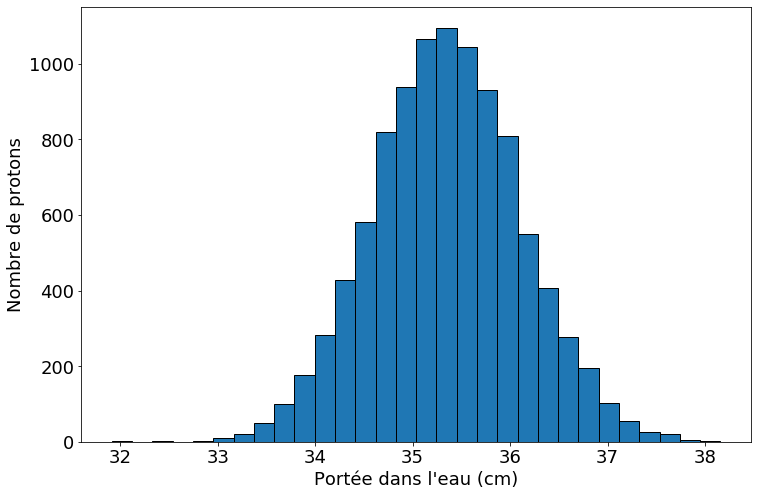

In [127]:
from scipy.integrate import quad

n_protons = 10000
énergies_tests = np.random.normal(240, 3, (n_protons, 1))
portées_eau_scipy = np.empty((n_protons, 1))
inv_Scol_eau = lambda T : 1 / Scol_eau(T)
temps = time.time()
for i in range(n_protons):
    portées_eau_scipy[i] = quad(inv_Scol_eau, start, énergies_tests[i], epsabs = cible)[0]

temps = time.time() - temps

print("Durée: {0} secondes. Fréquence: {1} protons par seconde".format(temps, n_protons / temps))

plt.figure(figsize=(12, 8))
plt.hist(portées_eau_scipy, bins=30, edgecolor='k')
plt.xlabel("Portée dans l'eau (cm)", fontsize=18)
plt.ylabel("Nombre de protons", fontsize=18)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

## 12.

## 13.

## 14.
